In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys 
sys.path.append('../')

In [4]:
from os.path import join
import pandas as pd
from matplotlib import rc
# enable latex
rc('text', usetex=True)

from utils import (
    load_json_file,
    load_pickle,
    generate_artifacts_dir,
    generate_evaluation_dir,
)

from common import (
    EvaluationResult
)


config_path = "/home/hjall/work/qai/xai/xai-nlp-benchmark/artifacts/xai-nlp-benchmark-2024-04-23-21-20-02/configs/gender_no_sub_samp_project_config.json"
config = load_json_file(config_path)
base_output_dir = "."


artifacts_dir = generate_artifacts_dir(config=config)
evaluation_dir = generate_evaluation_dir(config=config)
file_path = join(
    artifacts_dir, evaluation_dir, config['evaluation']['evaluation_records']
)
evaluation_results: EvaluationResult = load_pickle(file_path)

/home/hjall/work/qai/xai/xai-nlp-benchmark/visualization/main.py:278: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  x='XAI Method',
/home/hjall/work/qai/xai/xai-nlp-benchmark/visualization/main.py:278: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  x='XAI Method',
/home/hjall/work/qai/xai/xai-nlp-benchmark/visualization/main.py:278: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  x='XAI Method',
/home/hjall/work/qai/xai/xai-nlp-benchmark/visualization/main.py:278: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  x='XAI Method',


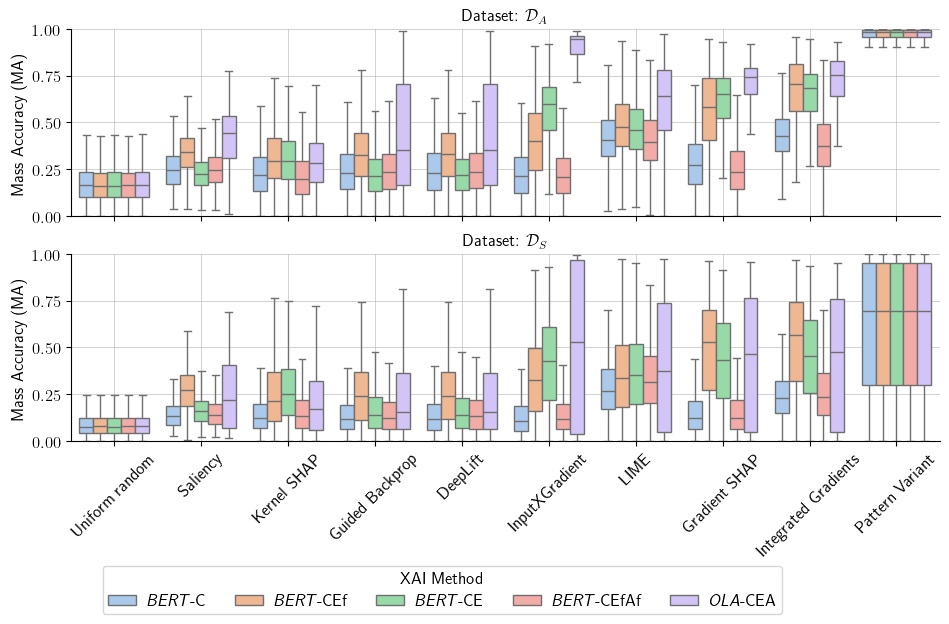

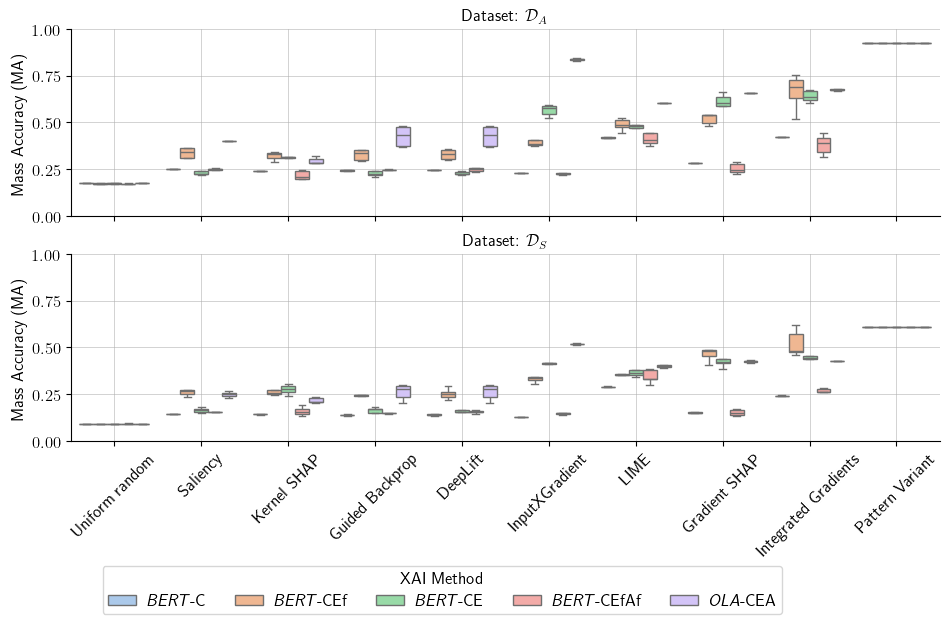

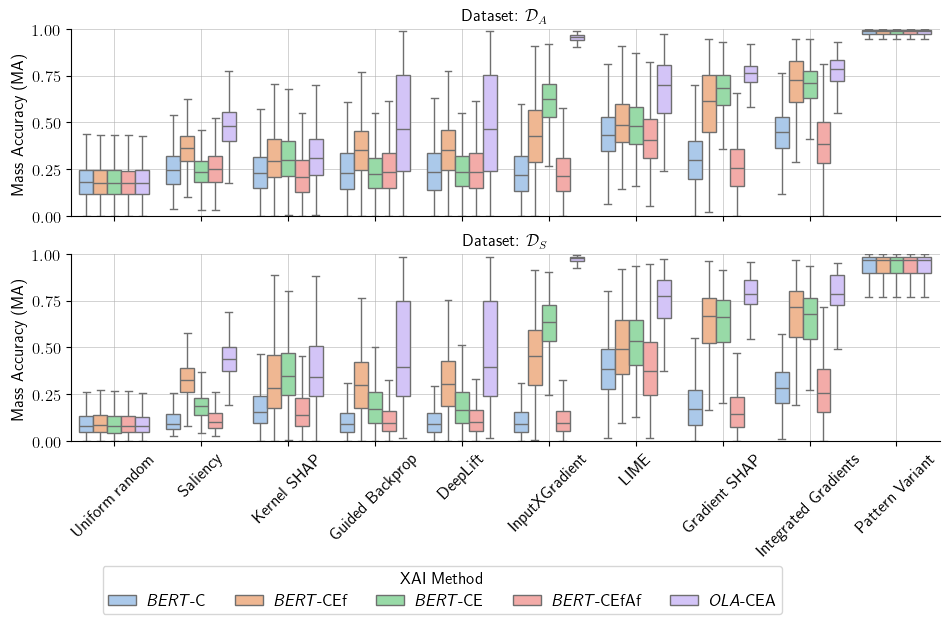

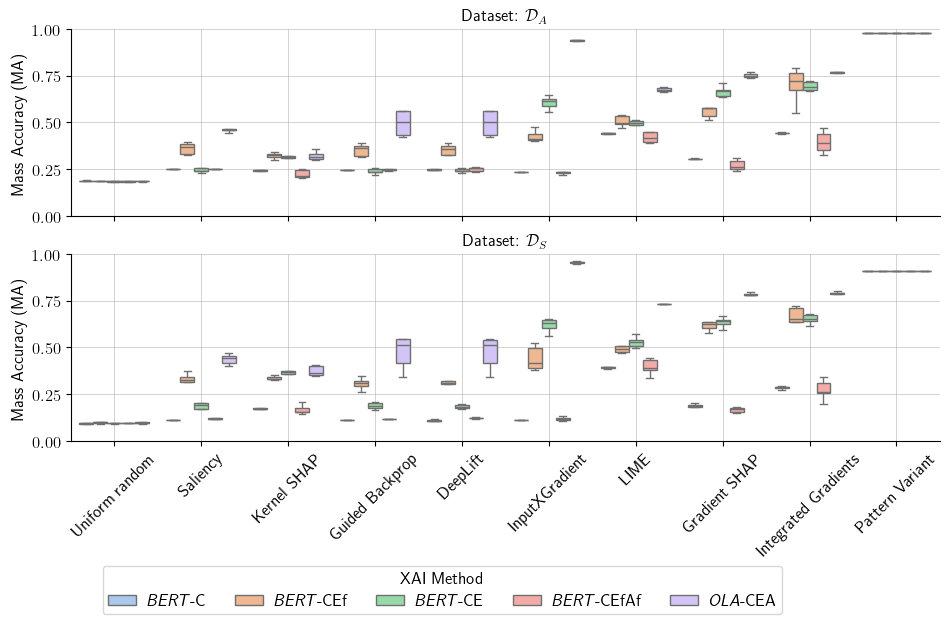

In [13]:
from visualization.main import plot_evaluation_results_grouped_by_xai_method

xai_visualization_methods = dict(
    mass_accuracy_method_grouped=plot_evaluation_results_grouped_by_xai_method,
)
for plot_type in ["mass_accuracy_method_grouped"]:
    for result_df, result_type in [
        (evaluation_results.xai_results_all, "filter_all"),
        (evaluation_results.xai_results_correct, "filter_correct"),
    ]:
        result_df = pd.DataFrame(result_df)
        if len(result_df) == 0:
            # E.g. for sentiment dataset we have no ground truth labels and therefore
            # the evaluation results are empty for the correct filter
            continue

        # Filter out methods not listed in config
        methods = result_df['attribution_method'].unique()
        for method in methods:
            if method not in config["xai"]["methods"]:
                result_df = result_df[result_df['attribution_method'] != method]

        for model_version, xai_group in result_df.groupby("model_version"):
            v = xai_visualization_methods.get(plot_type, None)
            if v is not None:
                v(xai_group, plot_type, model_version, result_type, base_output_dir)